In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error
import os
import sys
import math
import seaborn as sns

parent_dir = os.path.dirname(os.path.realpath('../../analysis'))

# Add the parent directory to sys.path
sys.path.append(parent_dir)

# Import the module from the parent directory
import analysis.model_assessment
import analysis.train_data_analysis
from analysis.model_assessment import *

Mean Squared Error:  0.027958924988971012
R-Squared of Fit:  -3.526292759252816
Mean Squared Error:  0.032039229263621814
R-Squared of Fit:  -4.186856486262548
Mean Squared Error:  0.02890962962936
R-Squared of Fit:  -1.5896614654908907


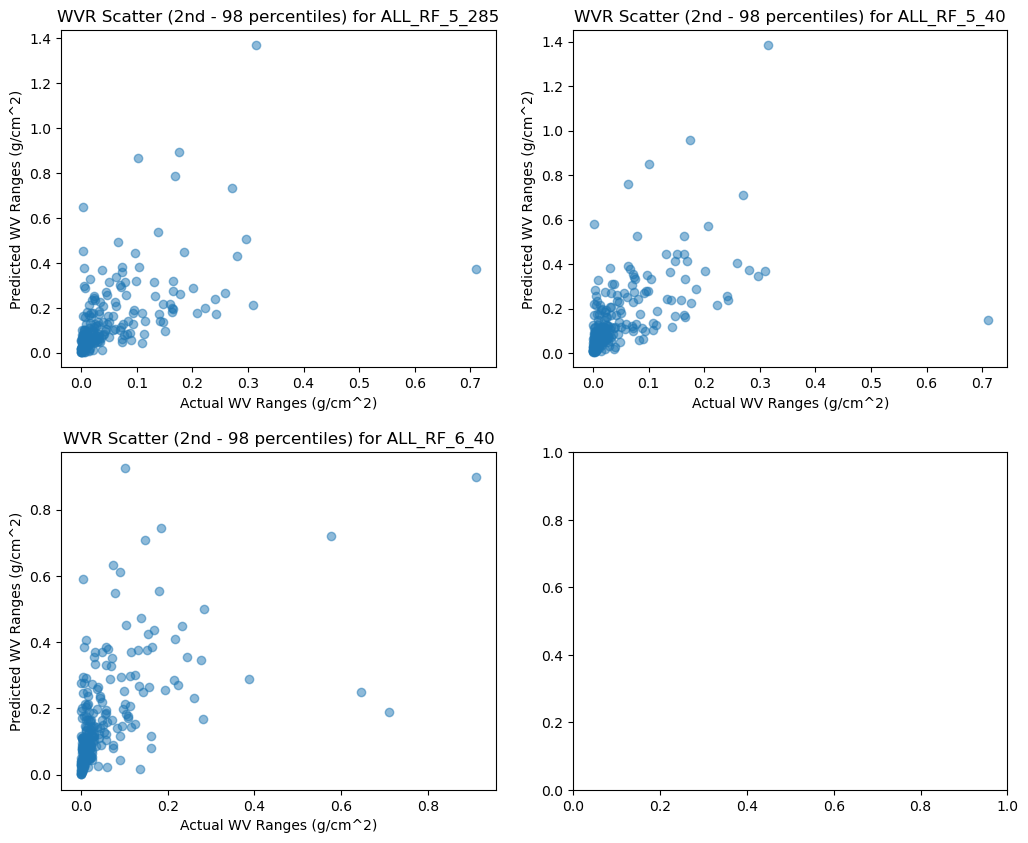

In [3]:
fnames = ['../../../model_results/train_set_1285/all_rf_5_285.npz', '../../../model_results/train_set_1285/all_rf_5_40.npz', '../../../model_results/train_set_1285/all_rf_6_40.npz']

fig, axs = plt.subplots(2, 2, figsize = (10, 8))
fig.tight_layout(pad=0.4, w_pad=2.5, h_pad=4.0)

row = 0
col = 0

for i in range(len(fnames)):

    if col == 2:
        col = 0
        row+=1

    path = fnames[i]
    data = np.load(path)
    y_pred, y_test, y_train = data['arr_0'], data['arr_1'], data['arr_2']

    model_name = path[path.rfind('/')+1: path.rfind('.')].upper()
    
    crosstrack_pixel_length = 1242
    num_test_scenes = math.floor(y_test.shape[0] / crosstrack_pixel_length)
    y_test = y_test.reshape((num_test_scenes, crosstrack_pixel_length))
    y_pred = y_pred.reshape((num_test_scenes, crosstrack_pixel_length))
    
    test_2 = np.percentile(y_test, 0.02, axis=1)
    pred_2 = np.percentile(y_pred, 0.02, axis=1)
    test_98 = np.percentile(y_test, 0.98, axis=1)
    pred_98 = np.percentile(y_pred, 0.98, axis=1)
    
    test_ranges = np.subtract(test_98, test_2)
    pred_ranges = np.subtract(pred_98, pred_2)
    
    title = 'WVR Scatter (2nd - 98 percentiles) for ' + model_name

    mse = mean_squared_error(test_ranges, pred_ranges)
    r2 = r2_score(test_ranges, pred_ranges)
    print('Mean Squared Error: ', mse)
    print('R-Squared of Fit: ', r2)

    #m, b = np.polyfit(test_ranges, pred_ranges, 1)
    #plt.plot(test_ranges, m*test_ranges+b)
    axs[row, col].scatter(test_ranges, pred_ranges, alpha = 0.5)
    axs[row, col].set_title(title);
    axs[row, col].set_xlabel('Actual WV Ranges (g/cm^2)');
    axs[row, col].set_ylabel('Predicted WV Ranges (g/cm^2)');

    col+=1

Mean Squared Error:  0.42258037951750704
R-Squared of Fit:  0.710267253832666
Mean Squared Error:  0.6485108893206758
R-Squared of Fit:  0.5553630741284448
Mean Squared Error:  1.3365531280178538
R-Squared of Fit:  0.2697933887372882


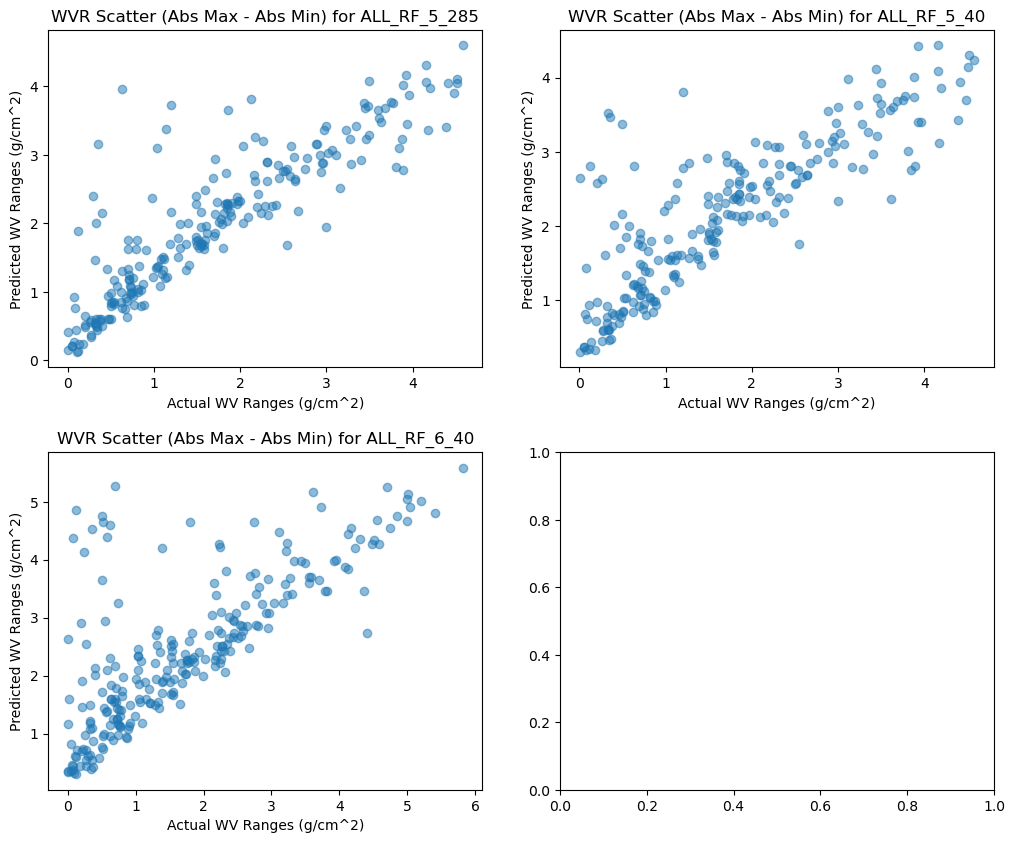

In [4]:
fnames = ['../../../model_results/train_set_1285/all_rf_5_285.npz', '../../../model_results/train_set_1285/all_rf_5_40.npz', '../../../model_results/train_set_1285/all_rf_6_40.npz']

fig, axs = plt.subplots(2, 2, figsize = (10, 8))
fig.tight_layout(pad=0.4, w_pad=2.5, h_pad=4.0)

row = 0
col = 0

for i in range(len(fnames)):

    if col == 2:
        col = 0
        row+=1

    path = fnames[i]
    data = np.load(path)
    y_pred, y_test, y_train = data['arr_0'], data['arr_1'], data['arr_2']

    model_name = path[path.rfind('/')+1: path.rfind('.')].upper()
    
    crosstrack_pixel_length = 1242
    num_test_scenes = math.floor(y_test.shape[0] / crosstrack_pixel_length)
    y_test = y_test.reshape((num_test_scenes, crosstrack_pixel_length))
    y_pred = y_pred.reshape((num_test_scenes, crosstrack_pixel_length))
    
    test_ranges = np.max(y_test, axis = 1) - np.min(y_test, axis = 1)
    pred_ranges = np.max(y_pred, axis = 1) - np.min(y_pred, axis = 1)
    
    title = 'WVR Scatter (Abs Max - Abs Min) for ' + model_name
    
    mse = mean_squared_error(test_ranges, pred_ranges)
    r2 = r2_score(test_ranges, pred_ranges)
    print('Mean Squared Error: ', mse)
    print('R-Squared of Fit: ', r2)

    #m, b = np.polyfit(test_ranges, pred_ranges, 1)
    #plt.plot(test_ranges, m*test_ranges+b)
    axs[row, col].scatter(test_ranges, pred_ranges, alpha = 0.5)
    axs[row, col].set_title(title);
    axs[row, col].set_xlabel('Actual WV Ranges (g/cm^2)');
    axs[row, col].set_ylabel('Predicted WV Ranges (g/cm^2)');

    col+=1